<a href="https://colab.research.google.com/github/Rekha-bapur/machine-learning/blob/master/Credit_Card__Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Detecting fraudulent credit card operations with machine learning algorithms

#### Classifying and evaluating credit card transactions with logistic regression and decision tree models


---



This project will address the problem of credit card fraud, a major concern for banks and customers, and the process of detecting fraudulent operations through **machine learning** techniques.

The scam usually occurs when someone accesses your credit or debit card numbers from unsecured websites or via an identity theft scheme to fraudulently obtain money or property. Due to its recurrence and the harm it may cause to both individuals and financial institutions, it is crucial to take preventive measures as well as identifying when a transaction is fraudulent.

![Credit Card Fraud](https://github.com/rmpbastos/data_science/blob/master/img/39934951.jpg?raw=true)

It is quite likely that on some occasions you've had your credit card blocked when trying to make a simple purchase, causing stress and embarrassment. When this happens, your bank or credit card issuer may have detected a suspicious activity, which sometimes is just a *false positive*.

Because of the massive volume of data available for each customer and each financial activity, **artificial intelligence** can be utilized to effectively identify suspicious patterns in transactions. To increase the accuracy of the analyses, many institutions are investing in the improvement of AI algorithms.


## About the Data

The dataset utilized in this project was provided by [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) and contains transactions made by credit cards in September 2013 by European cardholders. The transactions reported occurred within two days.

We can observe that the dataset is highly unbalanced, since it has 492 (0.17%) frauds out of 284,807 transactions.

All the features in the dataset are numerical. Due to client confidentiality, the columns were renamed to V1, V2, ..., V28, and its features went through a [PCA](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) transformation, which consists in zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. The only two exceptions were the features `Time` and `Amount`, containing the seconds elapsed between each transaction and the first transaction in the dataset, and the transaction amount, respectively.

The feature `Class` is the dependent variable and takes the values:
* **0** for regular transactions
* **1** for fraudulent activity

### Importing libraries and csv file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# import file into a dataframe

df_fraud = pd.read_csv(file_path)

The data provided by Kaggle is ready to use and does not need any wrangling. We can move on to the exploratory analysis.

## Exploratory Data Analysis

First of all, let's take a look at the first entries of our dataset.



In [ ]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We can see that the PCA transformation changed the columns V1 to v28 numerical, securing the data anonymity.

Now let's examine some statistical elements and check if there are missing values.

In [ ]:
# basic statistical details
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# check for missing values
print('Number of missing data:', df_fraud.isnull().sum().max())

Number of missing data: 0


Notice that the mean value for `Amount` is \$88.35 and the majority of transactions were lower than \$100.00, which is plausible. The standard deviation is \$250.12 and we have a maximum transaction value of \$25,691.16. Moreover, there are no missing values, so we are ready to move on.

Now, let's visualize the discrepancy in our dataset.

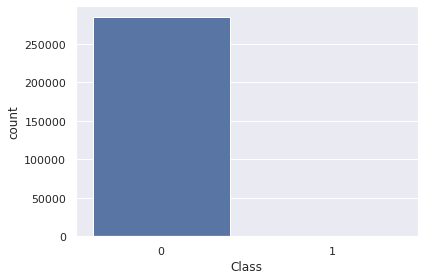

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.countplot(x='Class', data=df_fraud)
plt.tight_layout()
plt.savefig('graph1.png')

In [ ]:
print(df_fraud['Class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((df_fraud[df_fraud['Class'] == 1].shape[0] / df_fraud.shape[0])))

0    284315
1       492
Name: Class, dtype: int64

Percentage of fraudulent activity: 0.17%


We can confirm how unbalanced our dataset is, with a meager 0.17% of fraudulent transactions.

Now let's examine the distribution of regular and fraudulent transactions over time.

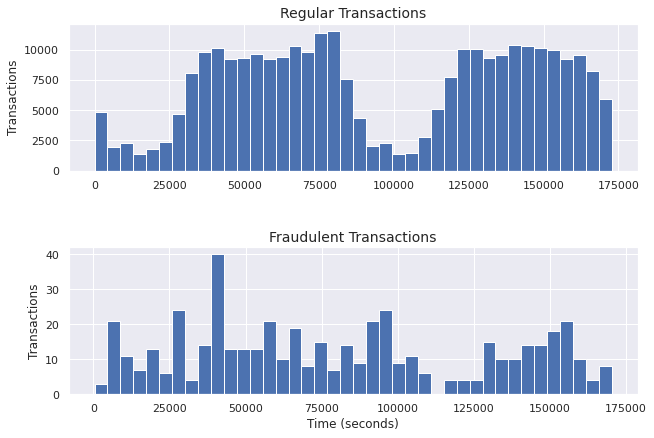

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df_fraud['Time'][df_fraud['Class'] == 0], bins=40)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df_fraud['Time'][df_fraud['Class'] == 1], bins=40)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout(pad=4.0)
plt.savefig('graph2.png')

Although the number of frauds is significantly smaller than the number of regular transactions, we can see a distinct behavior, especially around the 100,000 `Time` mark.

Notice that the number of regular transactions drops sharply around the 90,000th second mark, to surge again around the 110,000th second mark. It wouldn't be absurd to assume that this period is during the night when individuals naturally perform fewer purchases and transactions than during the daytime. On the other hand, a great number of fraudulent transactions occurred around the 100,000 mark, which could confirm the previous assumption, considering that criminals should prefer to commit fraud late at night, assuming there would be less surveillance.

Of course, this is just a hypothesis. Let's wait and see how our machine learning model will interpret these numbers.

We can do the same analysis with the `Amount` of each transaction.

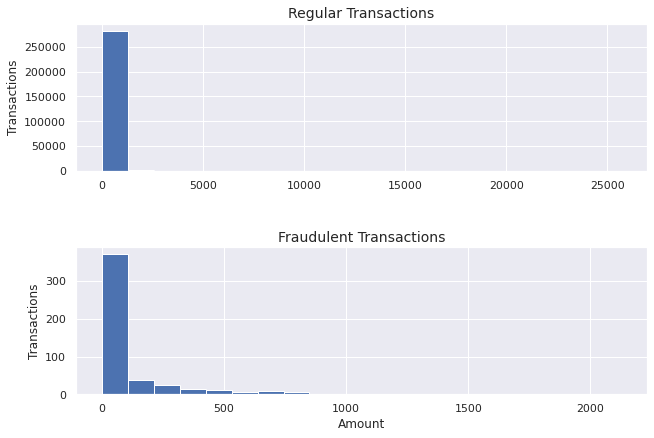

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df_fraud['Amount'][df_fraud['Class'] == 0], bins=20)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df_fraud['Amount'][df_fraud['Class'] == 1], bins=20)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Amount')

plt.tight_layout(pad=4.0)
plt.savefig('graph3.png')

As for the transactions' amount, apparently there is no significant insight we can gather from them. Most transactions, both regular and fraudulent, were of "small" values. As we saw earlier, the majority of the transactions were of less than \$100,00. 

However, we can perform a deeper inspection with a boxplot graph.

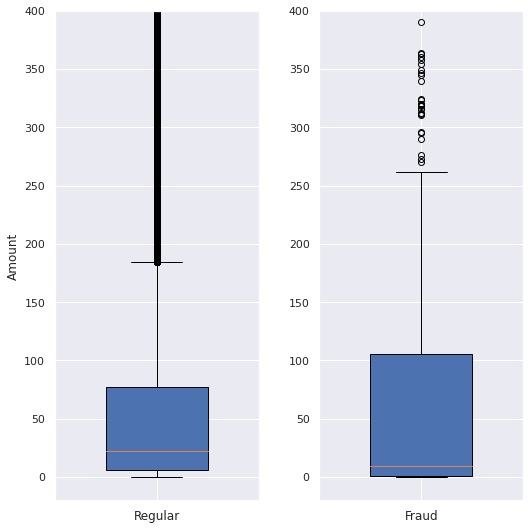

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

ax[0].boxplot(df_fraud['Amount'][df_fraud['Class'] == 0], widths= 0.5 , patch_artist=True)
ax[0].set_ylim(-20, 400)
ax[0].set_xticklabels(['Regular'], fontsize=12)
ax[0].set_ylabel('Amount', fontsize=12)

ax[1].boxplot(df_fraud['Amount'][df_fraud['Class'] == 1], widths= 0.5, patch_artist=True)
ax[1].set_ylim(-20, 400)
ax[1].set_xticklabels(['Fraud'], fontsize=12)

plt.tight_layout(pad=3.0)
plt.savefig('graph4.png')

Once again, there is no large disparity between the two distributions. Now let's plot a correlation matrix to determine the correlation between the variables.

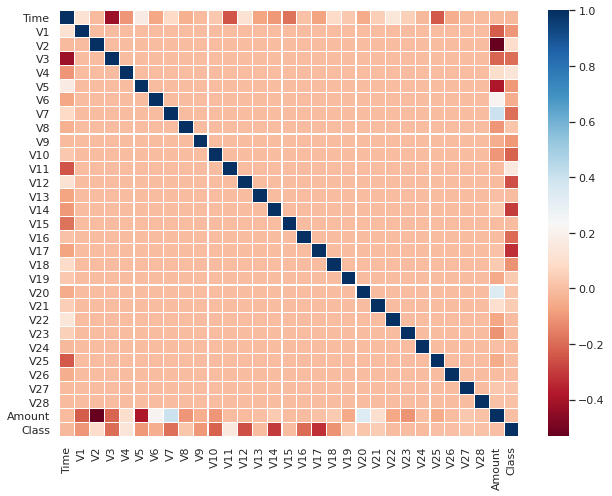

In [ ]:
corr = df_fraud.corr()
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.savefig('graph5.png')

We did not observe any strong correlation between the variables.

Now let's start handling our machine learning model.

## Machine Learning Models

Before setting up the machine learning model, we need to follow three steps: 
* Preprocess the features `Time` and `Amount` with `StandardScaler`
* Split the dataset into train and test data
* Deal with the unbalanced dataset

### Preprocessing

This is a crucial step in that the data is transformed to be easily interpreted by the machine learning algorithm.

In [ ]:
df_fraud_clean = df_fraud.copy()

scaler = StandardScaler()
df_fraud_clean['std_amount'] = scaler.fit_transform(df_fraud_clean['Amount'].values.reshape(-1, 1))
df_fraud_clean['std_time'] = scaler.fit_transform(df_fraud_clean['Time'].values.reshape(-1, 1))

df_fraud_clean.drop(['Amount', 'Time'], axis=1, inplace=True)

df_fraud_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


#### Splitting into train and test data

After transforming the `Amount` and `Time ` features, let's split our dataset into train and test data. The size of the test data is 0.25, the default value.

In [ ]:
# define our feature matrix and target vector
X = df_fraud_clean.drop('Class', axis=1)
y = df_fraud_clean['Class']

# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Balancing the dataset

As we mentioned before, the dataset is highly unbalanced. Since there is a severe skew in the class distribution (284,315 entries in **Class = 0** and 492 in **Class = 1**), our training dataset could be biased and influence the machine learning algorithm to display unsatisfactory results, for instance, ignoring the class with fewer entries.

To address the problem we will randomly balance the data with the aid of `RandomUnderSampler`.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    386
0    386
dtype: int64


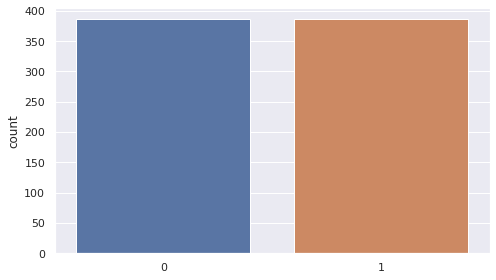

In [ ]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# check the balanced data
print(pd.Series(y_rus).value_counts())

# plot the new distribution
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_rus)
plt.tight_layout()
plt.savefig('graph6.png')

Now we have balanced data, with 351 entries for each class. Let's check the correlation matrix once again to see if we can determine some correlation.

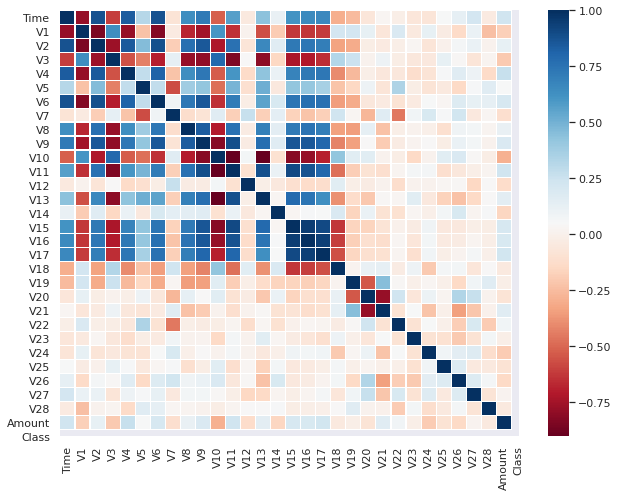

In [ ]:
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.savefig('graph7.png')

Notice that with balanced data out correlation matrix shows meaningful  correlations between some features, unlike the correlation matrix displayed earlier.

**Similarity**

In [ ]:
from scipy import spatial

In [ ]:
sampleData = df_fraud.head(20000)

In [ ]:
samples = df_fraud.loc[30401:30500]

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
frame = []

In [ ]:
for i in range(30401, 30501):
    t1 = samples.loc[i]
    c = samples.loc[i]["Class"]
    for j in range(20000):
        t2 = sampleData.loc[j]
        classLabel = df_fraud.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        frame.append([classLabel, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 10 transactions having highest similarity with transaction ID = "+str(i)+" and class = "+str(c)+":")
    print(df_sorted.iloc[:10])
    print("\n")
    frame = []



Top 10 transactions having highest similarity with transaction ID = 30401 and class = 0.0:
       Class  Similarity  Transaction ID
16709    0.0         1.0           16709
18754    0.0         1.0           18754
15840    0.0         1.0           15840
16254    0.0         1.0           16254
18586    0.0         1.0           18586
16628    0.0         1.0           16628
18438    0.0         1.0           18438
18046    0.0         1.0           18046
15946    0.0         1.0           15946
14804    0.0         1.0           14804


Top 10 transactions having highest similarity with transaction ID = 30402 and class = 0.0:
       Class  Similarity  Transaction ID
19040    0.0         1.0           19040
16720    0.0         1.0           16720
18994    0.0         1.0           18994
19142    0.0         1.0           19142
15480    0.0         1.0           15480
17628    0.0         1.0           17628
17591    0.0         1.0           17591
17876    0.0         1.0           17

### Classification Models

We are going to utilize two of the main machine learning classification methods:
* Logistic Regression
* Decision Tree

#### Logistic Regression

Logistic regression models are used to determine the odds of a certain class or event existing. In our case, it will establish the probability of a transaction belonging to `Class` 0 or 1, which is regular or fraudulent.

In [ ]:
model_log = LogisticRegression()

model_log.fit(X_rus, y_rus)

y_pred_log = model_log.predict(X_test)

Now let's evaluate the accuracy of our model using `classification_report`, `roc_auc_score` and `confusion_matrix`. 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71096
           1       0.04      0.92      0.07       106

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202

AUC: 0.94



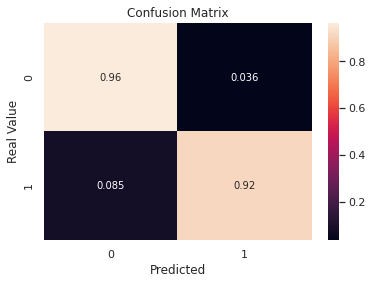

<Figure size 432x288 with 0 Axes>

In [ ]:
# classification report
print(classification_report(y_test, y_pred_log))

# ROC AUC score
print("AUC: {:.2f}\n".format(roc_auc_score(y_test, y_pred_log)))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_log, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()
plt.savefig('graph8.png')

Notice that the model has an accuracy of 97% and a ROC AUC score of 95%, meaning that our logistic regression performed really well. 

From the confusion matrix, we can conclude that 97% of the regular transactions were correctly classified as regular (True Negatives) and 93% of the fraudulent transactions were accurately classified as frauds (True Positives).

#### Decision Tree

We already saw that the logistic regression model performed well. Now let's see how the decision tree performs.

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     71096
           1       0.02      0.89      0.04       106

    accuracy                           0.94     71202
   macro avg       0.51      0.91      0.50     71202
weighted avg       1.00      0.94      0.97     71202

AUC: 0.91



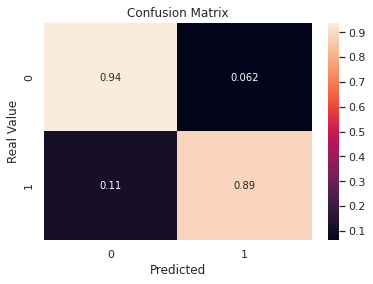

<Figure size 432x288 with 0 Axes>

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

model_tree.fit(X_rus, y_rus)

y_pred_tree = model_tree.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_tree))

# ROC AUC score
print("AUC: {:.2f}\n".format(roc_auc_score(y_test, y_pred_tree)))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_tree, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()
plt.savefig('graph9.png')

The decision tree also performs quite well, with an accuracy of 97% and a ROC AUC score of 93%. The true positives and true negatives were well predicted, with 97% and 90%, respectively.

Let's plot the decision tree to see how the decisions are made through its branches.

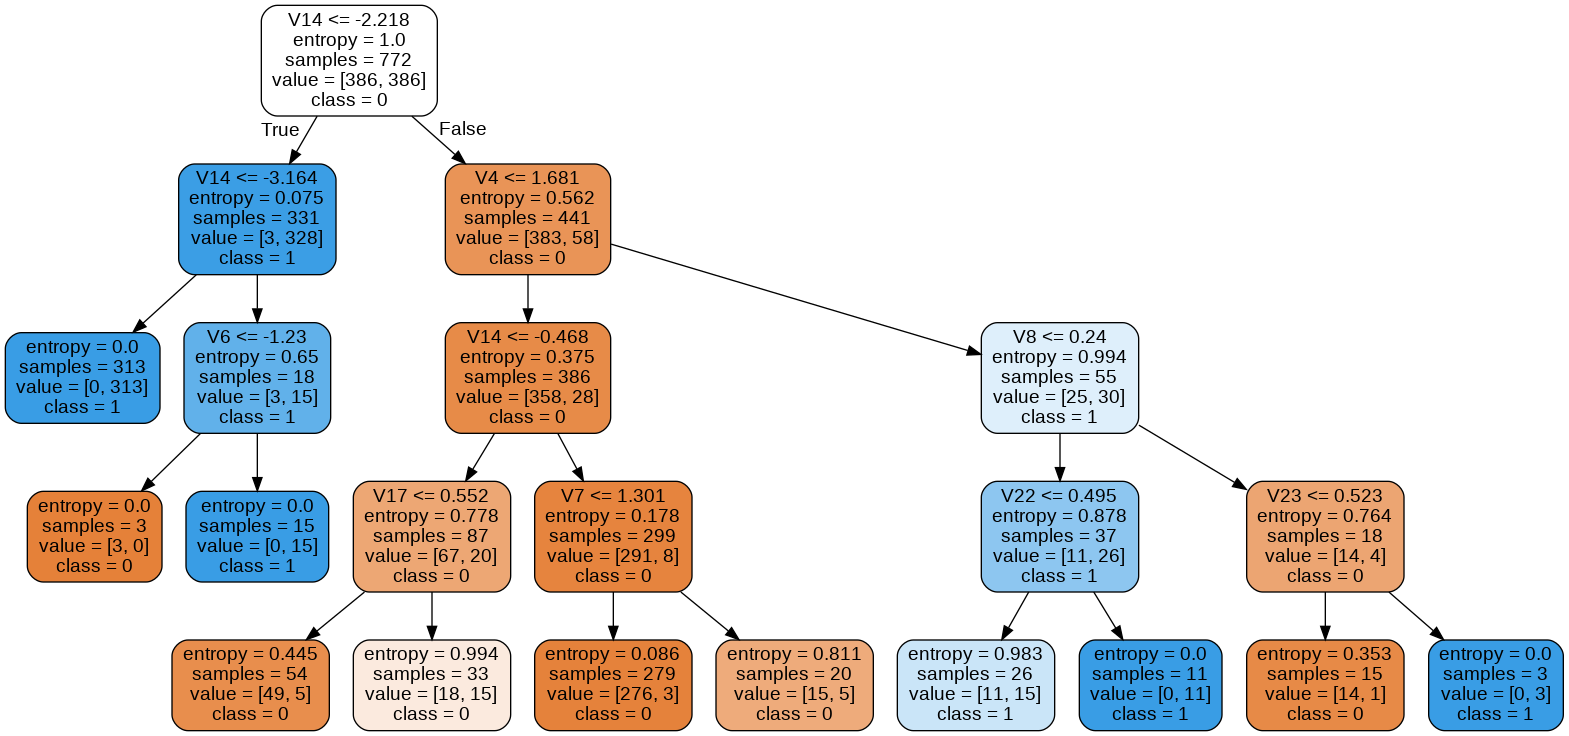

In [ ]:
dot = export_graphviz(model_tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

 Notice how the decisions are made by dividing the inputs into smaller decision nodes and leaves.


## Conclusion

Both models, **Logistic Regression** and **Decision Tree** performed extremely well in classifying credit card activities into the classes **Regular Transaction** and **Fraudulent Transaction**, with accuracy, ROC AUC scores and precision above 90%. Although they produced similar outcomes, the **Logistic Regression** showed slightly better results, with a greater ROC AUC score, which measures how well the model is capable to distinguish between classes.

It is important to point out how crucial it is to preprocess and balance the data. Remember how better the correlation matrix performed after the class data was balanced.

The machine learning algorithms for detecting credit card fraud are highly efficient, but there are still gaps to close. One of the biggest problems is the occurrence of False Positives, that is when the algorithm incorrectly detects a fraud. Thus, we are always searching for ways to shrink even more that 3% of False Positives.